In [1]:
# Step 1: Load Dataset and Libraries - Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/sales_data_with_discounts.csv'  # Replace with the correct path if running locally
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [2]:
# Step 2: Descriptive Analytics - Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Compute statistics
stats = {}
for column in numerical_columns:
    stats[column] = {
        'Mean': data[column].mean(),
        'Median': data[column].median(),
        'Mode': data[column].mode()[0],
        'Std Dev': data[column].std()
    }

# Display results
print("Descriptive Statistics:")
for column, measures in stats.items():
    print(f"\nColumn: {column}")
    for measure, value in measures.items():
        print(f"{measure}: {value:.2f}")


Descriptive Statistics:

Column: Volume
Mean: 5.07
Median: 4.00
Mode: 3.00
Std Dev: 4.23

Column: Avg Price
Mean: 10453.43
Median: 1450.00
Mode: 400.00
Std Dev: 18079.90

Column: Total Sales Value
Mean: 33812.84
Median: 5700.00
Mode: 24300.00
Std Dev: 50535.07

Column: Discount Rate (%)
Mean: 15.16
Median: 16.58
Mode: 5.01
Std Dev: 4.22

Column: Discount Amount
Mean: 3346.50
Median: 988.93
Mode: 69.18
Std Dev: 4509.90

Column: Net Sales Value
Mean: 30466.34
Median: 4677.79
Mode: 326.97
Std Dev: 46358.66


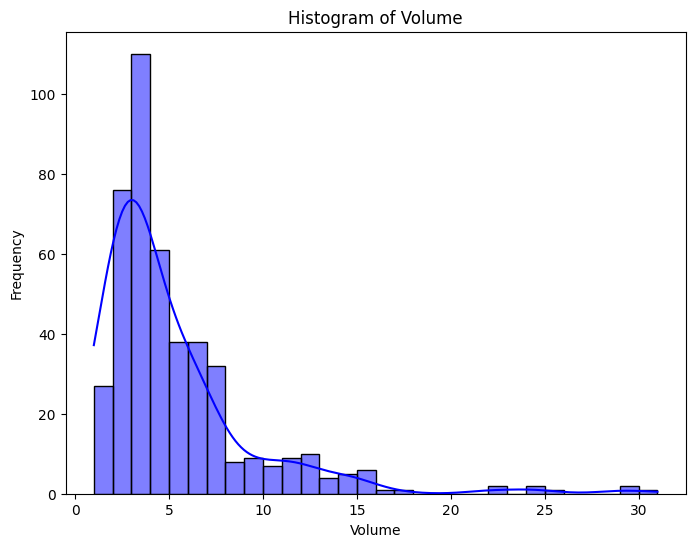

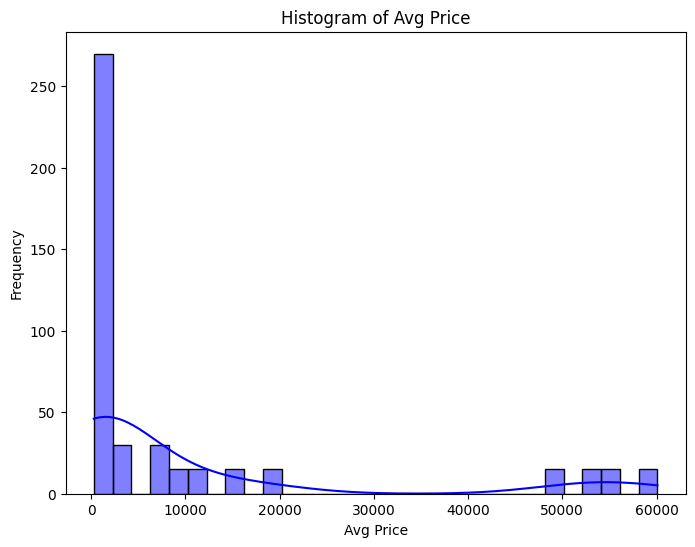

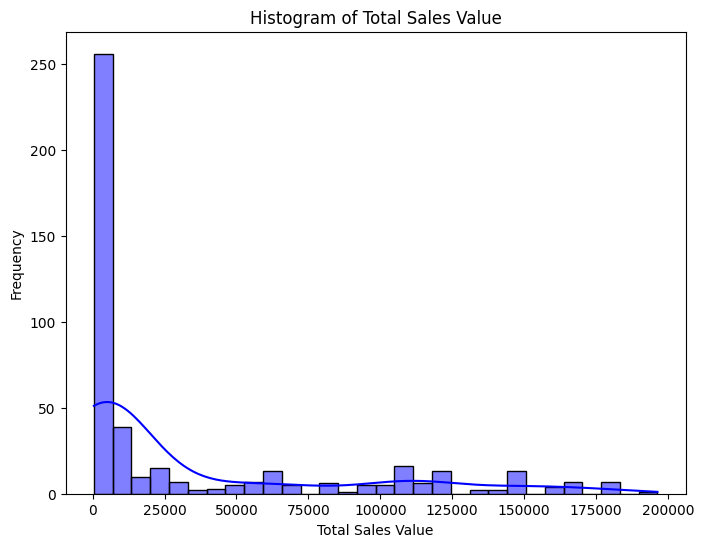

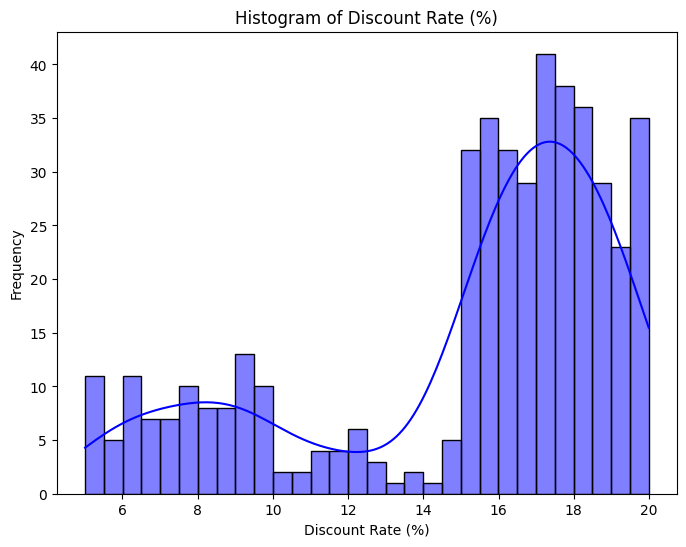

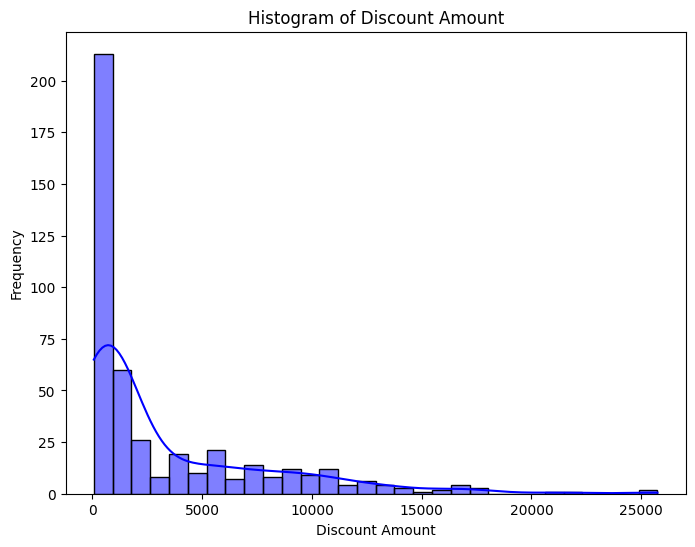

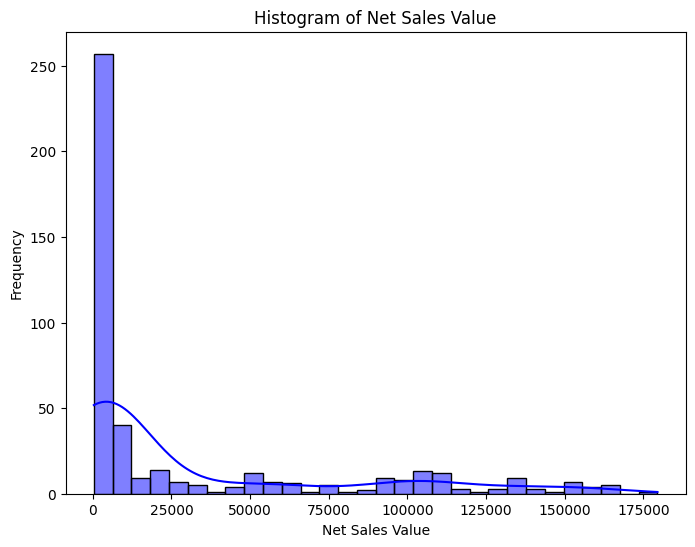

In [3]:
# Step 3: Data Visualization
#(a) Histograms for Numerical Columns (Plot histograms)
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


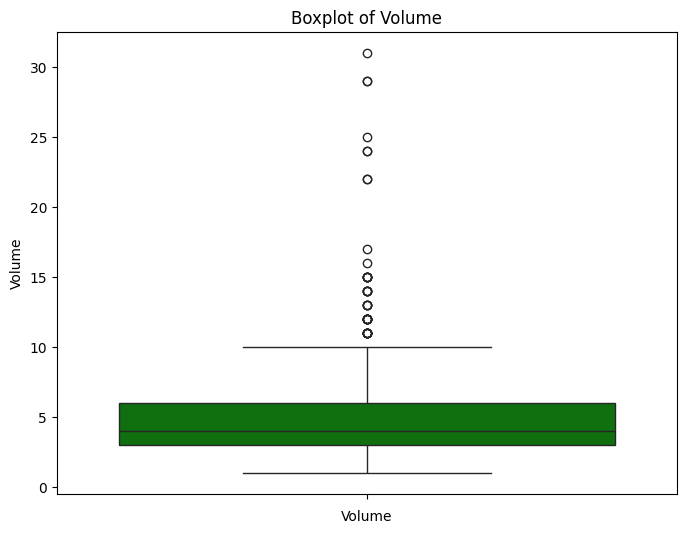

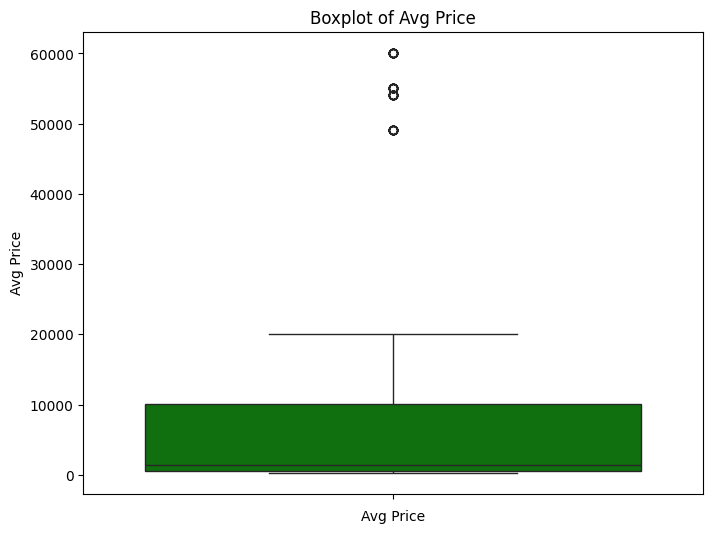

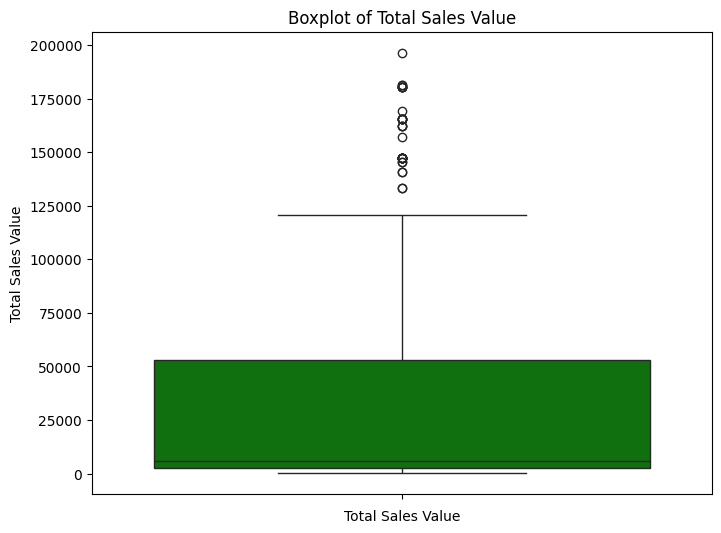

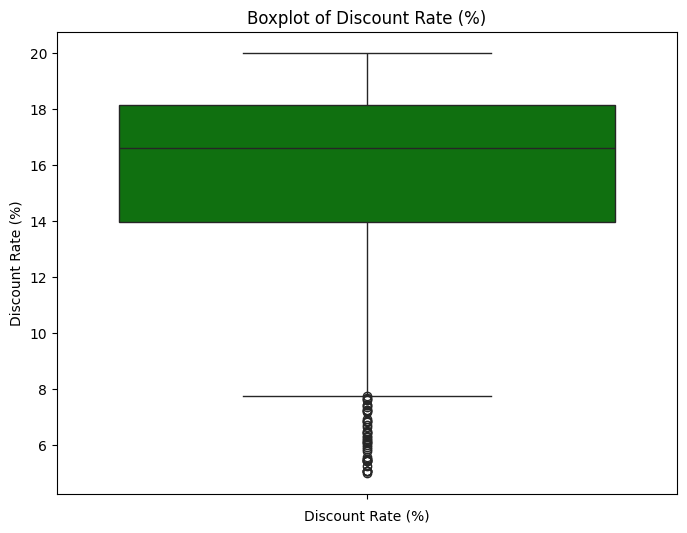

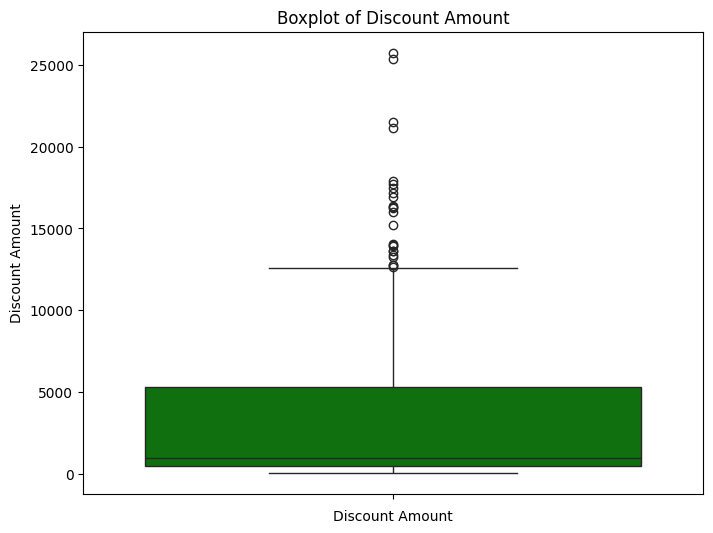

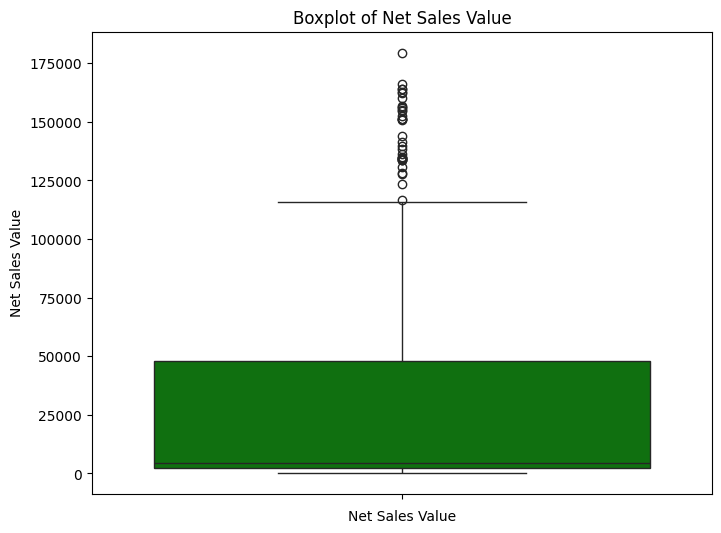

In [4]:
# (b) Boxplots for Numerical Columns - Plot boxplots
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[column], color='green')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


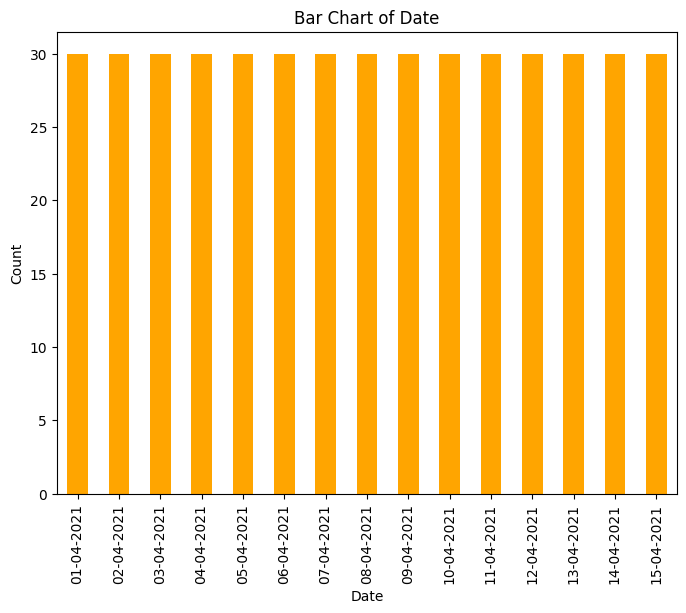

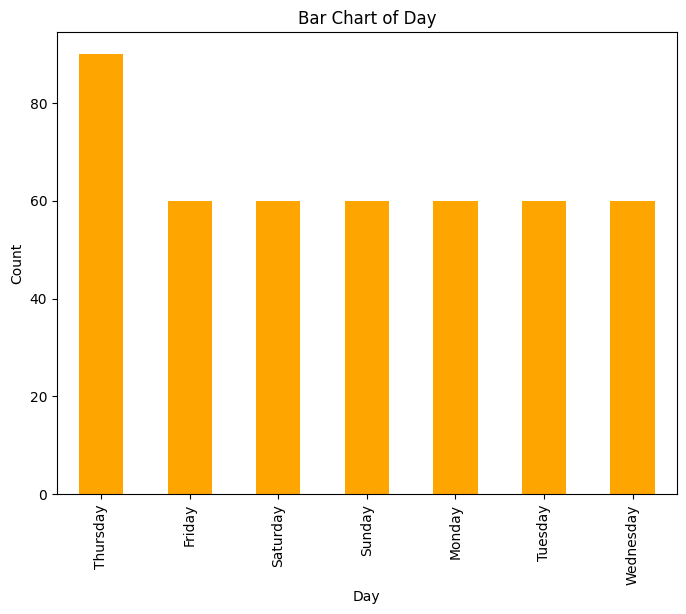

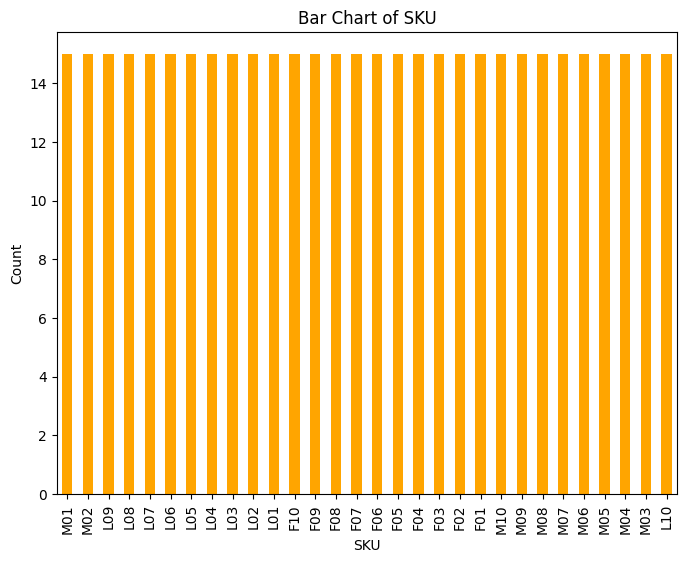

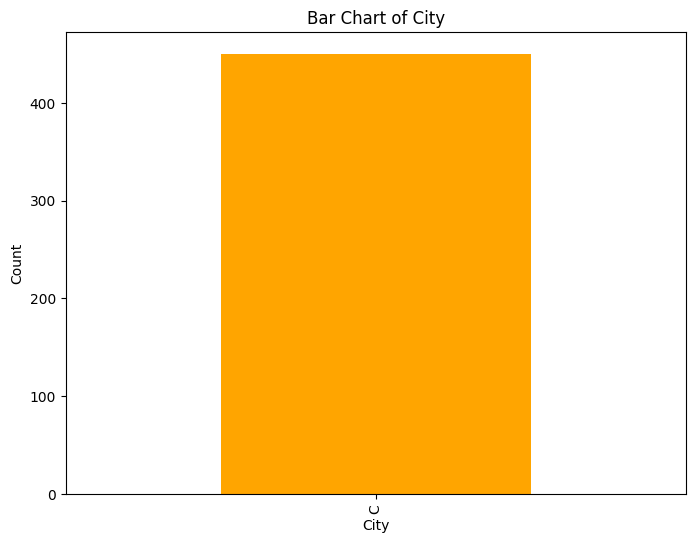

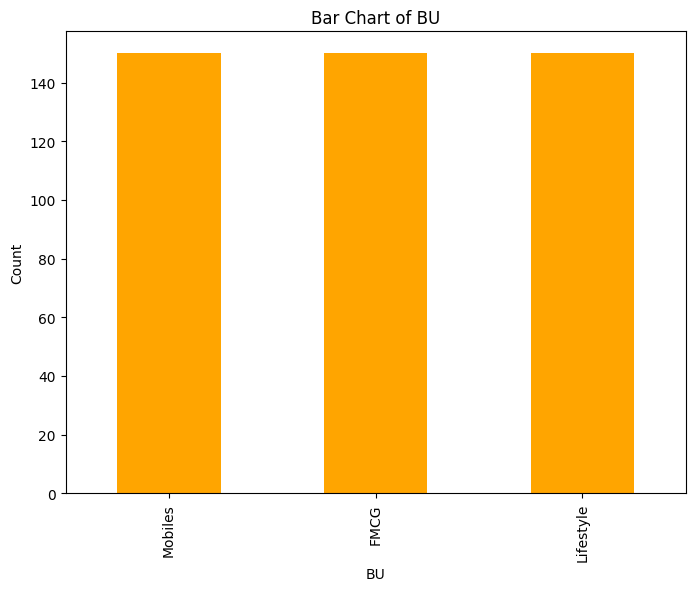

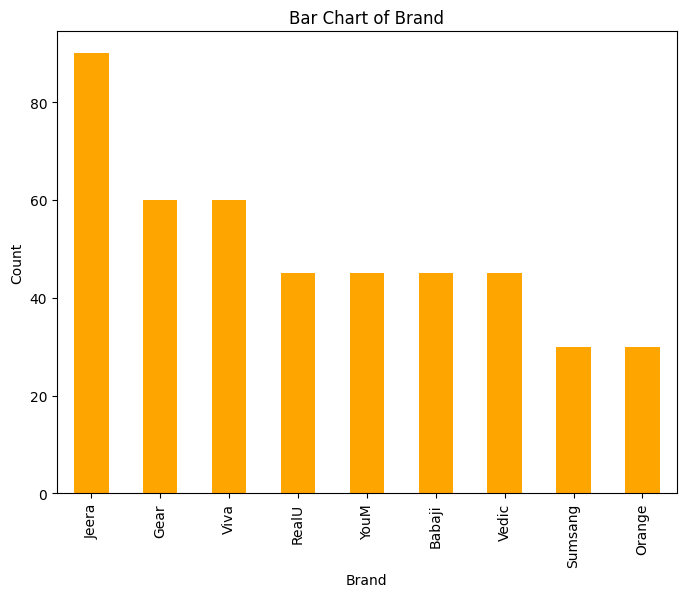

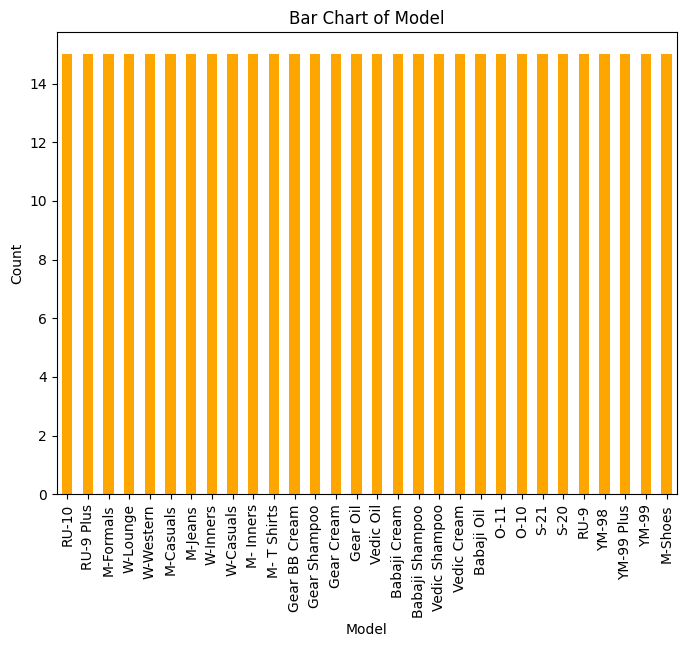

In [5]:
# (c) Bar Charts for Categorical Columns
#Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Plot bar charts
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot(kind='bar', color='orange')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [6]:
#Step 4: Standardization
standardized_data = data.copy()
for column in numerical_columns:
    standardized_data[column] = (data[column] - data[column].mean()) / data[column].std()

# Compare original vs. standardized
print("Original and Standardized Data (First 5 Rows):")
print(pd.concat([data[numerical_columns].head(), standardized_data[numerical_columns].head()], axis=1))


Original and Standardized Data (First 5 Rows):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value    Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
0    160346.501180  2.347417   0.091072           2.922469          -0.829365   
1     89323.897039  1.165831  -0.019548           1.329516          -0.851714   
2    102042.089843  0.456880   0.312312           1.561038          -1.350129   
3    112235.925298  0.220563   0.533552           1.717365          -1.947555   
4     19927.053770 -0.488389  -0.130168          -0.188242           0.67

In [11]:
#Step 5: One-Hot Encoding
# One-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_columns)

# Display transformed dataset
print("Transformed Dataset (First 5 Rows):")
print(encoded_data.head())


Transformed Dataset (First 5 Rows):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_

In [9]:
"""# Step 6: Conclusion

Key Findings from Descriptive Analytics and Data Visualizations:

Descriptive Statistics: The descriptive statistics (mean, median, mode, standard deviation) provide a quantitative summary of the central tendency and dispersion of numerical features in your dataset. These statistics help to understand the distribution and variability of each feature.
Histograms: Histograms visually represent the distribution of numerical data, showing the frequency of values within specific ranges (bins). They reveal the shape of the distribution, including skewness, and identify potential outliers.
Boxplots: Boxplots provide a visual summary of the distribution of numerical data, highlighting quartiles, outliers, and potential skewness. They are useful for comparing the distribution of a feature across different categories.
Bar Charts: Bar charts display the frequency or count of categorical data, providing insights into the distribution of different categories within a feature. They help identify the most frequent and least frequent categories.
Importance of Data Preprocessing:

Standardization: Standardization transforms numerical features to have zero mean and unit variance. This is crucial for machine learning algorithms that are sensitive to the scale of features, such as those using distance-based calculations. Standardization ensures that all features contribute equally to the model's learning process.

One-Hot Encoding: One-hot encoding converts categorical features into numerical representations using dummy variables. This is necessary because many machine learning algorithms cannot directly handle categorical data. One-hot encoding avoids imposing an ordinal relationship between categories and ensures that the model treats all categories equally.

In summary, descriptive analytics and data visualizations provide valuable insights into the characteristics and patterns of your data. Data preprocessing steps like standardization and one-hot encoding are essential for preparing your data for machine learning models, improving model performance, and ensuring accurate results"""





"# Step 6: **Conclusion**\n\nKey Findings from Descriptive Analytics and Data Visualizations:\n\nDescriptive Statistics: The descriptive statistics (mean, median, mode, standard deviation) provide a quantitative summary of the central tendency and dispersion of numerical features in your dataset. These statistics help to understand the distribution and variability of each feature.\nHistograms: Histograms visually represent the distribution of numerical data, showing the frequency of values within specific ranges (bins). They reveal the shape of the distribution, including skewness, and identify potential outliers.\nBoxplots: Boxplots provide a visual summary of the distribution of numerical data, highlighting quartiles, outliers, and potential skewness. They are useful for comparing the distribution of a feature across different categories.\nBar Charts: Bar charts display the frequency or count of categorical data, providing insights into the distribution of different categories within